In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset and adding column names
cols = ['Age', 'Sex', 'CP', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAng', 'OldPeak', 'Slope', 'Ca', 'Thal', 'Num']
dataset = pd.read_csv('processed.cleveland.data', header = None, names = cols)

print (dataset.info())
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age            303 non-null float64
Sex            303 non-null float64
CP             303 non-null float64
RestingBP      303 non-null float64
Cholesterol    303 non-null float64
FastingBS      303 non-null float64
RestingECG     303 non-null float64
MaxHR          303 non-null float64
ExerciseAng    303 non-null float64
OldPeak        303 non-null float64
Slope          303 non-null float64
Ca             303 non-null object
Thal           303 non-null object
Num            303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None
    Age  Sex   CP  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0  63.0  1.0  1.0      145.0        233.0        1.0         2.0  150.0   
1  67.0  1.0  4.0      160.0        286.0        0.0         2.0  108.0   
2  67.0  1.0  4.0      120.0        229.0        0.0         2.0  129.0   
3  37.0  1.0  3.0      130

In [3]:
# Finding missing values and removing those rows
missing_values = ["?"]
df = pd.read_csv("processed.cleveland.data",header = None, names = cols, na_values = missing_values)
print(df.info())
print(df.isna())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age            303 non-null float64
Sex            303 non-null float64
CP             303 non-null float64
RestingBP      303 non-null float64
Cholesterol    303 non-null float64
FastingBS      303 non-null float64
RestingECG     303 non-null float64
MaxHR          303 non-null float64
ExerciseAng    303 non-null float64
OldPeak        303 non-null float64
Slope          303 non-null float64
Ca             299 non-null float64
Thal           301 non-null float64
Num            303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None
       Age    Sex     CP  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    False  False  False      False        False      False       False   
1    False  False  False      False        False      False       False   
2    False  False  False      False        False      False       False   
3    False  False  False      False 

In [4]:
df.replace('?', np.nan, inplace = True)
df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
Age            297 non-null float64
Sex            297 non-null float64
CP             297 non-null float64
RestingBP      297 non-null float64
Cholesterol    297 non-null float64
FastingBS      297 non-null float64
RestingECG     297 non-null float64
MaxHR          297 non-null float64
ExerciseAng    297 non-null float64
OldPeak        297 non-null float64
Slope          297 non-null float64
Ca             297 non-null float64
Thal           297 non-null float64
Num            297 non-null int64
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
None


In [5]:
a = pd.get_dummies(df['CP'], prefix = "CP")
b = pd.get_dummies(df['Thal'], prefix = "Thal")
c = pd.get_dummies(df['Slope'], prefix = "Slope")
d = pd.get_dummies(df['RestingECG'], prefix = "RestingECG")
frames = [df, a, b, c, d]
df = pd.concat(frames, axis = 1)

to_be_dropped = ['CP', 'Thal', 'Slope', 'RestingECG']
df = df.drop(to_be_dropped, axis=1)
print(df.head())

    Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAng  OldPeak  \
0  63.0  1.0      145.0        233.0        1.0  150.0          0.0      2.3   
1  67.0  1.0      160.0        286.0        0.0  108.0          1.0      1.5   
2  67.0  1.0      120.0        229.0        0.0  129.0          1.0      2.6   
3  37.0  1.0      130.0        250.0        0.0  187.0          0.0      3.5   
4  41.0  0.0      130.0        204.0        0.0  172.0          0.0      1.4   

    Ca  Num  ...  CP_4.0  Thal_3.0  Thal_6.0  Thal_7.0  Slope_1.0  Slope_2.0  \
0  0.0    0  ...       0         0         1         0          0          0   
1  3.0    2  ...       1         1         0         0          0          1   
2  2.0    1  ...       1         0         0         1          0          1   
3  0.0    0  ...       0         1         0         0          0          0   
4  0.0    0  ...       0         1         0         0          1          0   

   Slope_3.0  RestingECG_0.0  RestingE

In [6]:
df.Num = [0 if i==0 else 1 for i in df.Num]

X = df.drop('Num', axis = 1)
y = df.Num.values
y = y.reshape(-1,1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense, Dropout

# ANN
classifier = Sequential()

classifier.add(Dense(16, activation = 'relu', input_dim = 22, kernel_initializer = 'uniform'))
classifier.add(Dropout(0.5))
classifier.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform'))
classifier.add(Dropout(0.5))
classifier.add(Dense(1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 25, epochs = 50, validation_data = (X_test, y_test))

print(classifier.summary())


Using TensorFlow backend.


Train on 237 samples, validate on 60 samples
Epoch 1/50
237/237 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.4937 - val_loss: 0.6908 - val_accuracy: 0.7167
Epoch 2/50
237/237 [==============================] - 0s 93us/step - loss: 0.6889 - accuracy: 0.6329 - val_loss: 0.6878 - val_accuracy: 0.6667
Epoch 3/50
237/237 [==============================] - 0s 93us/step - loss: 0.6846 - accuracy: 0.6709 - val_loss: 0.6820 - val_accuracy: 0.7167
Epoch 4/50
237/237 [==============================] - 0s 80us/step - loss: 0.6780 - accuracy: 0.6751 - val_loss: 0.6730 - val_accuracy: 0.7667
Epoch 5/50
237/237 [==============================] - 0s 84us/step - loss: 0.6634 - accuracy: 0.6920 - val_loss: 0.6590 - val_accuracy: 0.8167
Epoch 6/50
237/237 [==============================] - 0s 93us/step - loss: 0.6421 - accuracy: 0.7257 - val_loss: 0.6392 - val_accuracy: 0.8167
Epoch 7/50
237/237 [==============================] - 0s 101us/step - loss: 0.6090 - accuracy: 0.8

In [10]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(16, activation = 'relu', input_dim = 22, kernel_initializer = 'uniform'))
    classifier.add(Dropout(0.5))
    classifier.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform'))
    classifier.add(Dropout(0.5))
    classifier.add(Dense(1, activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 25, epochs = 50)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = 1)
mean = accuracies.mean()
variance = accuracies.std()
print('Mean: ', mean)
print('Variance: ', variance)

Epoch 1/50
213/213 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5352
Epoch 2/50
213/213 [==============================] - 0s 66us/step - loss: 0.6854 - accuracy: 0.6714
Epoch 3/50
213/213 [==============================] - 0s 70us/step - loss: 0.6783 - accuracy: 0.6479
Epoch 4/50
213/213 [==============================] - 0s 75us/step - loss: 0.6674 - accuracy: 0.6714
Epoch 5/50
213/213 [==============================] - 0s 70us/step - loss: 0.6520 - accuracy: 0.6761
Epoch 6/50
213/213 [==============================] - 0s 75us/step - loss: 0.6233 - accuracy: 0.7230
Epoch 7/50
213/213 [==============================] - 0s 75us/step - loss: 0.6040 - accuracy: 0.7418
Epoch 8/50
213/213 [==============================] - 0s 75us/step - loss: 0.5787 - accuracy: 0.7700
Epoch 9/50
213/213 [==============================] - 0s 85us/step - loss: 0.5500 - accuracy: 0.7934
Epoch 10/50
213/213 [==============================] - 0s 70us/step - loss: 0.5313 - accurac

Epoch 31/50
213/213 [==============================] - 0s 75us/step - loss: 0.4066 - accuracy: 0.8310
Epoch 32/50
213/213 [==============================] - 0s 70us/step - loss: 0.3567 - accuracy: 0.8545
Epoch 33/50
213/213 [==============================] - 0s 70us/step - loss: 0.3563 - accuracy: 0.8451
Epoch 34/50
213/213 [==============================] - 0s 75us/step - loss: 0.3447 - accuracy: 0.8638
Epoch 35/50
213/213 [==============================] - 0s 70us/step - loss: 0.3815 - accuracy: 0.8545
Epoch 36/50
213/213 [==============================] - 0s 80us/step - loss: 0.3349 - accuracy: 0.8451
Epoch 37/50
213/213 [==============================] - 0s 75us/step - loss: 0.3744 - accuracy: 0.8592
Epoch 38/50
213/213 [==============================] - 0s 75us/step - loss: 0.3362 - accuracy: 0.8779
Epoch 39/50
213/213 [==============================] - 0s 75us/step - loss: 0.3721 - accuracy: 0.8498
Epoch 40/50
213/213 [==============================] - 0s 80us/step - loss: 0.3749

213/213 [==============================] - 0s 71us/step - loss: 0.3720 - accuracy: 0.8873
Epoch 41/50
213/213 [==============================] - 0s 70us/step - loss: 0.3674 - accuracy: 0.8826
Epoch 42/50
213/213 [==============================] - 0s 80us/step - loss: 0.3822 - accuracy: 0.8732
Epoch 43/50
213/213 [==============================] - 0s 75us/step - loss: 0.3661 - accuracy: 0.8873
Epoch 44/50
213/213 [==============================] - 0s 70us/step - loss: 0.3925 - accuracy: 0.8779
Epoch 45/50
213/213 [==============================] - 0s 75us/step - loss: 0.3485 - accuracy: 0.8732
Epoch 46/50
213/213 [==============================] - 0s 75us/step - loss: 0.3449 - accuracy: 0.8732
Epoch 47/50
213/213 [==============================] - 0s 75us/step - loss: 0.3696 - accuracy: 0.8732
Epoch 48/50
213/213 [==============================] - 0s 75us/step - loss: 0.3749 - accuracy: 0.8826
Epoch 49/50
213/213 [==============================] - 0s 75us/step - loss: 0.3739 - accuracy:

214/214 [==============================] - 0s 70us/step - loss: 0.4037 - accuracy: 0.8738
Epoch 50/50
23/23 [==============================] - 0s 4ms/step
Epoch 1/50
214/214 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4673
Epoch 2/50
214/214 [==============================] - 0s 79us/step - loss: 0.6899 - accuracy: 0.5514
Epoch 3/50
214/214 [==============================] - 0s 70us/step - loss: 0.6843 - accuracy: 0.6028
Epoch 4/50
214/214 [==============================] - 0s 70us/step - loss: 0.6771 - accuracy: 0.6589
Epoch 5/50
214/214 [==============================] - 0s 70us/step - loss: 0.6716 - accuracy: 0.6542
Epoch 6/50
214/214 [==============================] - 0s 75us/step - loss: 0.6559 - accuracy: 0.7196
Epoch 7/50
214/214 [==============================] - 0s 75us/step - loss: 0.6472 - accuracy: 0.7103
Epoch 8/50
214/214 [==============================] - 0s 75us/step - loss: 0.6236 - accuracy: 0.7336
Epoch 9/50
214/214 [==================

In [11]:
# Improving and tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(16, activation = 'relu', input_dim = 22, kernel_initializer = 'uniform'))
    classifier.add(Dropout(0.5))
    classifier.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform'))
    classifier.add(Dropout(0.5))
    classifier.add(Dense(1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 50],
              'epochs': [25, 50],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best parameters: ', best_parameters)
print('Best accuracy: ', best_accuracy)

Epoch 1/25
213/213 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5399
Epoch 2/25
213/213 [==============================] - 0s 80us/step - loss: 0.6889 - accuracy: 0.6385
Epoch 3/25
213/213 [==============================] - 0s 80us/step - loss: 0.6824 - accuracy: 0.6714
Epoch 4/25
213/213 [==============================] - 0s 70us/step - loss: 0.6757 - accuracy: 0.6526
Epoch 5/25
213/213 [==============================] - 0s 73us/step - loss: 0.6656 - accuracy: 0.7277
Epoch 6/25
213/213 [==============================] - 0s 75us/step - loss: 0.6523 - accuracy: 0.7793
Epoch 7/25
213/213 [==============================] - 0s 75us/step - loss: 0.6342 - accuracy: 0.7746
Epoch 8/25
213/213 [==============================] - 0s 75us/step - loss: 0.6119 - accuracy: 0.7465
Epoch 9/25
213/213 [==============================] - 0s 70us/step - loss: 0.5826 - accuracy: 0.7887
Epoch 10/25
213/213 [==============================] - 0s 70us/step - loss: 0.5455 - accurac

213/213 [==============================] - 0s 80us/step - loss: 0.5919 - accuracy: 0.7934
Epoch 12/25
213/213 [==============================] - 0s 87us/step - loss: 0.5483 - accuracy: 0.8592
Epoch 13/25
213/213 [==============================] - 0s 75us/step - loss: 0.5212 - accuracy: 0.8357
Epoch 14/25
213/213 [==============================] - 0s 70us/step - loss: 0.4836 - accuracy: 0.8357
Epoch 15/25
213/213 [==============================] - 0s 75us/step - loss: 0.4610 - accuracy: 0.8404
Epoch 16/25
213/213 [==============================] - 0s 75us/step - loss: 0.4463 - accuracy: 0.8638
Epoch 17/25
213/213 [==============================] - 0s 75us/step - loss: 0.4589 - accuracy: 0.8498
Epoch 18/25
213/213 [==============================] - 0s 75us/step - loss: 0.4470 - accuracy: 0.8638
Epoch 19/25
213/213 [==============================] - 0s 75us/step - loss: 0.4155 - accuracy: 0.8263
Epoch 20/25
213/213 [==============================] - 0s 75us/step - loss: 0.4332 - accuracy:

213/213 [==============================] - 0s 70us/step - loss: 0.4572 - accuracy: 0.8310
Epoch 22/25
213/213 [==============================] - 0s 66us/step - loss: 0.4499 - accuracy: 0.8310
Epoch 23/25
213/213 [==============================] - 0s 75us/step - loss: 0.4360 - accuracy: 0.8638
Epoch 24/25
213/213 [==============================] - 0s 75us/step - loss: 0.4526 - accuracy: 0.8216
Epoch 25/25
213/213 [==============================] - 0s 70us/step - loss: 0.4536 - accuracy: 0.8263
Epoch 1/25
213/213 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.6009
Epoch 2/25
213/213 [==============================] - 0s 61us/step - loss: 0.6841 - accuracy: 0.6901
Epoch 3/25
213/213 [==============================] - 0s 66us/step - loss: 0.6755 - accuracy: 0.6901
Epoch 4/25
213/213 [==============================] - 0s 66us/step - loss: 0.6645 - accuracy: 0.7230
Epoch 5/25
213/213 [==============================] - 0s 66us/step - loss: 0.6479 - accuracy: 0.755

214/214 [==============================] - 0s 96us/step - loss: 0.6451 - accuracy: 0.6308
Epoch 7/25
214/214 [==============================] - 0s 107us/step - loss: 0.6271 - accuracy: 0.6262
Epoch 8/25
214/214 [==============================] - 0s 107us/step - loss: 0.6045 - accuracy: 0.6402
Epoch 9/25
214/214 [==============================] - 0s 103us/step - loss: 0.5967 - accuracy: 0.6402
Epoch 10/25
214/214 [==============================] - 0s 89us/step - loss: 0.5802 - accuracy: 0.7150
Epoch 11/25
214/214 [==============================] - 0s 84us/step - loss: 0.5790 - accuracy: 0.7383
Epoch 12/25
214/214 [==============================] - 0s 70us/step - loss: 0.5662 - accuracy: 0.7710
Epoch 13/25
214/214 [==============================] - 0s 65us/step - loss: 0.5368 - accuracy: 0.8271
Epoch 14/25
214/214 [==============================] - 0s 75us/step - loss: 0.5450 - accuracy: 0.7617
Epoch 15/25
214/214 [==============================] - 0s 79us/step - loss: 0.5296 - accuracy:

213/213 [==============================] - 0s 75us/step - loss: 0.4061 - accuracy: 0.8638
Epoch 42/50
213/213 [==============================] - 0s 70us/step - loss: 0.3898 - accuracy: 0.8685
Epoch 43/50
213/213 [==============================] - 0s 80us/step - loss: 0.3537 - accuracy: 0.8310
Epoch 44/50
213/213 [==============================] - 0s 80us/step - loss: 0.3996 - accuracy: 0.8404
Epoch 45/50
213/213 [==============================] - 0s 70us/step - loss: 0.3767 - accuracy: 0.8310
Epoch 46/50
213/213 [==============================] - 0s 85us/step - loss: 0.3484 - accuracy: 0.8263
Epoch 47/50
213/213 [==============================] - 0s 85us/step - loss: 0.3493 - accuracy: 0.8732
Epoch 48/50
213/213 [==============================] - 0s 75us/step - loss: 0.3629 - accuracy: 0.8451
Epoch 49/50
213/213 [==============================] - 0s 75us/step - loss: 0.3442 - accuracy: 0.8310
Epoch 50/50
213/213 [==============================] - 0s 99us/step - loss: 0.3826 - accuracy:

213/213 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5211
Epoch 2/50
213/213 [==============================] - 0s 75us/step - loss: 0.6900 - accuracy: 0.6808
Epoch 3/50
213/213 [==============================] - 0s 75us/step - loss: 0.6879 - accuracy: 0.6479
Epoch 4/50
213/213 [==============================] - 0s 80us/step - loss: 0.6840 - accuracy: 0.7136
Epoch 5/50
213/213 [==============================] - 0s 70us/step - loss: 0.6751 - accuracy: 0.7512
Epoch 6/50
213/213 [==============================] - 0s 85us/step - loss: 0.6664 - accuracy: 0.7653
Epoch 7/50
213/213 [==============================] - 0s 75us/step - loss: 0.6487 - accuracy: 0.7653
Epoch 8/50
213/213 [==============================] - 0s 75us/step - loss: 0.6326 - accuracy: 0.7934
Epoch 9/50
213/213 [==============================] - 0s 70us/step - loss: 0.6056 - accuracy: 0.8075
Epoch 10/50
213/213 [==============================] - 0s 75us/step - loss: 0.5827 - accuracy: 0.8028
E

214/214 [==============================] - 0s 70us/step - loss: 0.4975 - accuracy: 0.8271
Epoch 12/50
214/214 [==============================] - 0s 75us/step - loss: 0.4950 - accuracy: 0.8037
Epoch 13/50
214/214 [==============================] - 0s 70us/step - loss: 0.4699 - accuracy: 0.8178
Epoch 14/50
214/214 [==============================] - 0s 70us/step - loss: 0.4439 - accuracy: 0.8271
Epoch 15/50
214/214 [==============================] - 0s 75us/step - loss: 0.4567 - accuracy: 0.8318
Epoch 16/50
214/214 [==============================] - 0s 79us/step - loss: 0.4139 - accuracy: 0.8271
Epoch 17/50
214/214 [==============================] - 0s 89us/step - loss: 0.4060 - accuracy: 0.8645
Epoch 18/50
214/214 [==============================] - 0s 79us/step - loss: 0.4146 - accuracy: 0.8411
Epoch 19/50
214/214 [==============================] - 0s 93us/step - loss: 0.4132 - accuracy: 0.8364
Epoch 20/50
214/214 [==============================] - 0s 84us/step - loss: 0.4218 - accuracy:

213/213 [==============================] - 0s 70us/step - loss: 0.5002 - accuracy: 0.8169
Epoch 22/50
213/213 [==============================] - 0s 80us/step - loss: 0.5010 - accuracy: 0.8028
Epoch 23/50
213/213 [==============================] - 0s 70us/step - loss: 0.5055 - accuracy: 0.8310
Epoch 24/50
213/213 [==============================] - 0s 66us/step - loss: 0.4899 - accuracy: 0.8357
Epoch 25/50
213/213 [==============================] - 0s 75us/step - loss: 0.4880 - accuracy: 0.8685
Epoch 26/50
213/213 [==============================] - 0s 75us/step - loss: 0.4884 - accuracy: 0.8357
Epoch 27/50
213/213 [==============================] - 0s 70us/step - loss: 0.4641 - accuracy: 0.8263
Epoch 28/50
213/213 [==============================] - 0s 85us/step - loss: 0.4429 - accuracy: 0.8545
Epoch 29/50
213/213 [==============================] - 0s 85us/step - loss: 0.4642 - accuracy: 0.8404
Epoch 30/50
213/213 [==============================] - 0s 85us/step - loss: 0.4810 - accuracy:

213/213 [==============================] - 0s 75us/step - loss: 0.3559 - accuracy: 0.8592
Epoch 32/50
213/213 [==============================] - 0s 89us/step - loss: 0.3752 - accuracy: 0.8545
Epoch 33/50
213/213 [==============================] - 0s 75us/step - loss: 0.3908 - accuracy: 0.8685
Epoch 34/50
213/213 [==============================] - 0s 70us/step - loss: 0.3773 - accuracy: 0.8498
Epoch 35/50
213/213 [==============================] - 0s 66us/step - loss: 0.3943 - accuracy: 0.8404
Epoch 36/50
213/213 [==============================] - 0s 70us/step - loss: 0.3422 - accuracy: 0.8685
Epoch 37/50
213/213 [==============================] - 0s 75us/step - loss: 0.3791 - accuracy: 0.8826
Epoch 38/50
213/213 [==============================] - 0s 75us/step - loss: 0.3970 - accuracy: 0.8638
Epoch 39/50
213/213 [==============================] - 0s 70us/step - loss: 0.3769 - accuracy: 0.8638
Epoch 40/50
213/213 [==============================] - 0s 80us/step - loss: 0.3738 - accuracy:

214/214 [==============================] - 0s 75us/step - loss: 0.3628 - accuracy: 0.8645
Epoch 42/50
214/214 [==============================] - 0s 75us/step - loss: 0.3628 - accuracy: 0.8551
Epoch 43/50
214/214 [==============================] - 0s 70us/step - loss: 0.3797 - accuracy: 0.8598
Epoch 44/50
214/214 [==============================] - 0s 70us/step - loss: 0.3876 - accuracy: 0.8224
Epoch 45/50
214/214 [==============================] - 0s 75us/step - loss: 0.3733 - accuracy: 0.8645
Epoch 46/50
214/214 [==============================] - 0s 79us/step - loss: 0.3916 - accuracy: 0.8318
Epoch 47/50
214/214 [==============================] - 0s 70us/step - loss: 0.4249 - accuracy: 0.8178
Epoch 48/50
214/214 [==============================] - 0s 65us/step - loss: 0.3561 - accuracy: 0.8411
Epoch 49/50
214/214 [==============================] - 0s 70us/step - loss: 0.3778 - accuracy: 0.8318
Epoch 50/50
214/214 [==============================] - 0s 70us/step - loss: 0.3753 - accuracy:

213/213 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5352
Epoch 2/25
213/213 [==============================] - 0s 42us/step - loss: 0.6898 - accuracy: 0.5728
Epoch 3/25
213/213 [==============================] - 0s 47us/step - loss: 0.6871 - accuracy: 0.6479
Epoch 4/25
213/213 [==============================] - 0s 47us/step - loss: 0.6845 - accuracy: 0.6573
Epoch 5/25
213/213 [==============================] - 0s 47us/step - loss: 0.6794 - accuracy: 0.6197
Epoch 6/25
213/213 [==============================] - 0s 47us/step - loss: 0.6732 - accuracy: 0.6808
Epoch 7/25
213/213 [==============================] - 0s 47us/step - loss: 0.6713 - accuracy: 0.6854
Epoch 8/25
213/213 [==============================] - 0s 42us/step - loss: 0.6639 - accuracy: 0.7042
Epoch 9/25
213/213 [==============================] - 0s 47us/step - loss: 0.6533 - accuracy: 0.7465
Epoch 10/25
213/213 [==============================] - 0s 47us/step - loss: 0.6368 - accuracy: 0.7606
E

213/213 [==============================] - 0s 38us/step - loss: 0.5880 - accuracy: 0.7042
Epoch 12/25
213/213 [==============================] - 0s 38us/step - loss: 0.5725 - accuracy: 0.6573
Epoch 13/25
213/213 [==============================] - 0s 42us/step - loss: 0.5582 - accuracy: 0.6854
Epoch 14/25
213/213 [==============================] - 0s 42us/step - loss: 0.5650 - accuracy: 0.7089
Epoch 15/25
213/213 [==============================] - 0s 47us/step - loss: 0.5532 - accuracy: 0.6761
Epoch 16/25
213/213 [==============================] - 0s 42us/step - loss: 0.5381 - accuracy: 0.6901
Epoch 17/25
213/213 [==============================] - 0s 42us/step - loss: 0.5292 - accuracy: 0.7183
Epoch 18/25
213/213 [==============================] - 0s 42us/step - loss: 0.5257 - accuracy: 0.7559
Epoch 19/25
213/213 [==============================] - 0s 42us/step - loss: 0.5002 - accuracy: 0.8216
Epoch 20/25
213/213 [==============================] - 0s 42us/step - loss: 0.5229 - accuracy:

213/213 [==============================] - 0s 47us/step - loss: 0.4850 - accuracy: 0.8310
Epoch 22/25
213/213 [==============================] - 0s 47us/step - loss: 0.4638 - accuracy: 0.8310
Epoch 23/25
213/213 [==============================] - 0s 47us/step - loss: 0.4249 - accuracy: 0.8498
Epoch 24/25
213/213 [==============================] - ETA: 0s - loss: 0.4458 - accuracy: 0.84 - 0s 47us/step - loss: 0.4354 - accuracy: 0.8638
Epoch 25/25
213/213 [==============================] - 0s 42us/step - loss: 0.4646 - accuracy: 0.8216
Epoch 1/25
214/214 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5187
Epoch 2/25
214/214 [==============================] - 0s 42us/step - loss: 0.6859 - accuracy: 0.6449
Epoch 3/25
214/214 [==============================] - 0s 42us/step - loss: 0.6827 - accuracy: 0.7243
Epoch 4/25
214/214 [==============================] - 0s 42us/step - loss: 0.6771 - accuracy: 0.7477
Epoch 5/25
214/214 [==============================] - 0s 

213/213 [==============================] - 0s 42us/step - loss: 0.4472 - accuracy: 0.8216
Epoch 32/50
213/213 [==============================] - 0s 47us/step - loss: 0.4051 - accuracy: 0.8451
Epoch 33/50
213/213 [==============================] - 0s 52us/step - loss: 0.3509 - accuracy: 0.8685
Epoch 34/50
213/213 [==============================] - 0s 56us/step - loss: 0.3690 - accuracy: 0.8592
Epoch 35/50
213/213 [==============================] - 0s 47us/step - loss: 0.4057 - accuracy: 0.8592
Epoch 36/50
213/213 [==============================] - 0s 47us/step - loss: 0.3534 - accuracy: 0.8451
Epoch 37/50
213/213 [==============================] - 0s 42us/step - loss: 0.3984 - accuracy: 0.8779
Epoch 38/50
213/213 [==============================] - 0s 47us/step - loss: 0.3964 - accuracy: 0.8169
Epoch 39/50
213/213 [==============================] - 0s 47us/step - loss: 0.3825 - accuracy: 0.8404
Epoch 40/50
213/213 [==============================] - 0s 47us/step - loss: 0.4092 - accuracy:

213/213 [==============================] - 0s 47us/step - loss: 0.3537 - accuracy: 0.8592
Epoch 42/50
213/213 [==============================] - 0s 42us/step - loss: 0.3507 - accuracy: 0.8967
Epoch 43/50
213/213 [==============================] - 0s 47us/step - loss: 0.3651 - accuracy: 0.8404
Epoch 44/50
213/213 [==============================] - 0s 42us/step - loss: 0.3792 - accuracy: 0.8451
Epoch 45/50
213/213 [==============================] - 0s 42us/step - loss: 0.3670 - accuracy: 0.8638
Epoch 46/50
213/213 [==============================] - 0s 42us/step - loss: 0.4046 - accuracy: 0.8404
Epoch 47/50
213/213 [==============================] - 0s 47us/step - loss: 0.4001 - accuracy: 0.8592
Epoch 48/50
213/213 [==============================] - 0s 47us/step - loss: 0.4031 - accuracy: 0.8732
Epoch 49/50
213/213 [==============================] - 0s 42us/step - loss: 0.3711 - accuracy: 0.8732
Epoch 50/50
213/213 [==============================] - 0s 47us/step - loss: 0.3872 - accuracy:

214/214 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5888
Epoch 2/50
214/214 [==============================] - 0s 42us/step - loss: 0.6892 - accuracy: 0.6682
Epoch 3/50
214/214 [==============================] - 0s 47us/step - loss: 0.6857 - accuracy: 0.7243
Epoch 4/50
214/214 [==============================] - 0s 47us/step - loss: 0.6795 - accuracy: 0.7196
Epoch 5/50
214/214 [==============================] - 0s 42us/step - loss: 0.6773 - accuracy: 0.7804
Epoch 6/50
214/214 [==============================] - 0s 47us/step - loss: 0.6698 - accuracy: 0.8131
Epoch 7/50
214/214 [==============================] - 0s 42us/step - loss: 0.6562 - accuracy: 0.7944
Epoch 8/50
214/214 [==============================] - 0s 42us/step - loss: 0.6464 - accuracy: 0.8131
Epoch 9/50
214/214 [==============================] - 0s 47us/step - loss: 0.6414 - accuracy: 0.8037
Epoch 10/50
214/214 [==============================] - 0s 47us/step - loss: 0.6333 - accuracy: 0.8037
E

213/213 [==============================] - 0s 52us/step - loss: 0.6184 - accuracy: 0.8169
Epoch 11/50
213/213 [==============================] - 0s 52us/step - loss: 0.6177 - accuracy: 0.8263
Epoch 12/50
213/213 [==============================] - 0s 47us/step - loss: 0.5828 - accuracy: 0.8216
Epoch 13/50
213/213 [==============================] - 0s 47us/step - loss: 0.5919 - accuracy: 0.8357
Epoch 14/50
213/213 [==============================] - 0s 42us/step - loss: 0.5703 - accuracy: 0.8310
Epoch 15/50
213/213 [==============================] - 0s 47us/step - loss: 0.5624 - accuracy: 0.8592
Epoch 16/50
213/213 [==============================] - 0s 47us/step - loss: 0.5640 - accuracy: 0.8404
Epoch 17/50
213/213 [==============================] - 0s 52us/step - loss: 0.5435 - accuracy: 0.8451
Epoch 18/50
213/213 [==============================] - 0s 47us/step - loss: 0.5501 - accuracy: 0.8404
Epoch 19/50
213/213 [==============================] - 0s 47us/step - loss: 0.5459 - accuracy:

213/213 [==============================] - 0s 42us/step - loss: 0.5065 - accuracy: 0.7934
Epoch 21/50
213/213 [==============================] - 0s 47us/step - loss: 0.4757 - accuracy: 0.7934
Epoch 22/50
213/213 [==============================] - 0s 52us/step - loss: 0.4784 - accuracy: 0.8169
Epoch 23/50
213/213 [==============================] - 0s 52us/step - loss: 0.4760 - accuracy: 0.8216
Epoch 24/50
213/213 [==============================] - 0s 47us/step - loss: 0.4646 - accuracy: 0.8263
Epoch 25/50
213/213 [==============================] - 0s 47us/step - loss: 0.4337 - accuracy: 0.8592
Epoch 26/50
213/213 [==============================] - 0s 52us/step - loss: 0.4354 - accuracy: 0.8404
Epoch 27/50
213/213 [==============================] - 0s 47us/step - loss: 0.4318 - accuracy: 0.8357
Epoch 28/50
213/213 [==============================] - 0s 47us/step - loss: 0.4370 - accuracy: 0.8169
Epoch 29/50
213/213 [==============================] - 0s 47us/step - loss: 0.4533 - accuracy:

214/214 [==============================] - 0s 42us/step - loss: 0.4203 - accuracy: 0.8271
Epoch 31/50
214/214 [==============================] - 0s 42us/step - loss: 0.4285 - accuracy: 0.8551
Epoch 32/50
214/214 [==============================] - 0s 47us/step - loss: 0.4366 - accuracy: 0.8131
Epoch 33/50
214/214 [==============================] - 0s 37us/step - loss: 0.4343 - accuracy: 0.8318
Epoch 34/50
214/214 [==============================] - 0s 42us/step - loss: 0.4463 - accuracy: 0.8178
Epoch 35/50
214/214 [==============================] - 0s 42us/step - loss: 0.4162 - accuracy: 0.8224
Epoch 36/50
214/214 [==============================] - 0s 47us/step - loss: 0.4017 - accuracy: 0.8271
Epoch 37/50
214/214 [==============================] - 0s 42us/step - loss: 0.4215 - accuracy: 0.8224
Epoch 38/50
214/214 [==============================] - 0s 47us/step - loss: 0.4226 - accuracy: 0.8458
Epoch 39/50
214/214 [==============================] - 0s 42us/step - loss: 0.4055 - accuracy:

C:\Users\kpchi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/25
237/237 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5570
Epoch 2/25
237/237 [==============================] - 0s 68us/step - loss: 0.6860 - accuracy: 0.6414
Epoch 3/25
237/237 [==============================] - 0s 68us/step - loss: 0.6718 - accuracy: 0.7511
Epoch 4/25
237/237 [==============================] - 0s 68us/step - loss: 0.6622 - accuracy: 0.7890
Epoch 5/25
237/237 [==============================] - 0s 72us/step - loss: 0.6439 - accuracy: 0.7595
Epoch 6/25
237/237 [==============================] - 0s 68us/step - loss: 0.6212 - accuracy: 0.8228
Epoch 7/25
237/237 [==============================] - 0s 68us/step - loss: 0.6177 - accuracy: 0.7848
Epoch 8/25
237/237 [==============================] - 0s 68us/step - loss: 0.5819 - accuracy: 0.7975
Epoch 9/25
237/237 [==============================] - 0s 68us/step - loss: 0.5646 - accuracy: 0.7932
Epoch 10/25
237/237 [==============================] - 0s 63us/step - loss: 0.5423 - accurac

In [12]:
classifier = Sequential()

classifier.add(Dense(16, activation = 'relu', input_dim = 22, kernel_initializer = 'uniform'))

classifier.add(Dropout(0.5))

classifier.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform'))

classifier.add(Dropout(0.5))

classifier.add(Dense(1, activation = 'sigmoid'))

classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = classifier.fit(X_train, y_train, batch_size = 25, epochs = 25, validation_data = (X_test, y_test))

print(classifier.summary())

Train on 237 samples, validate on 60 samples
Epoch 1/25
237/237 [==============================] - 1s 2ms/step - loss: 0.6881 - accuracy: 0.5907 - val_loss: 0.6860 - val_accuracy: 0.7667
Epoch 2/25
237/237 [==============================] - 0s 84us/step - loss: 0.6775 - accuracy: 0.7215 - val_loss: 0.6727 - val_accuracy: 0.7833
Epoch 3/25
237/237 [==============================] - 0s 76us/step - loss: 0.6644 - accuracy: 0.7722 - val_loss: 0.6545 - val_accuracy: 0.8000
Epoch 4/25
237/237 [==============================] - 0s 106us/step - loss: 0.6379 - accuracy: 0.7848 - val_loss: 0.6323 - val_accuracy: 0.8000
Epoch 5/25
237/237 [==============================] - 0s 84us/step - loss: 0.6150 - accuracy: 0.8186 - val_loss: 0.6090 - val_accuracy: 0.8000
Epoch 6/25
237/237 [==============================] - 0s 76us/step - loss: 0.5917 - accuracy: 0.8017 - val_loss: 0.5857 - val_accuracy: 0.8000
Epoch 7/25
237/237 [==============================] - 0s 76us/step - loss: 0.5624 - accuracy: 0.8

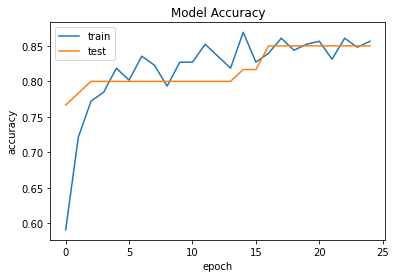

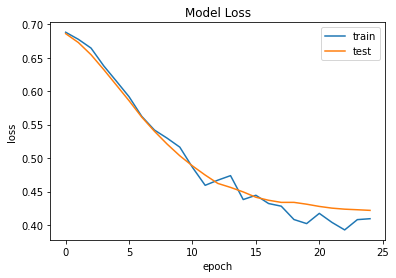

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test,y_pred))
print('Classification report:')
print( classification_report(y_test, y_pred))

Accuracy score:  0.85
Confusion matrix:
[[28  2]
 [ 7 23]]
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        30
           1       0.92      0.77      0.84        30

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60

